## Annual Averages

After downloading the surface temperature and precipitation, we can now plot it for the continental United States. Let's begin by loading our data.

In [1]:
import xarray as xarr

# open file, convert to celsius
datafile = "./data/clipped_daily_single_1988.nc"
data = xarr.open_dataset(datafile)
data["t2m_celsius"] = data['t2m'] - 273.15

Then, let's calculate the mean of each across the US and over time. For our nationwide temperature average, let's ensure to weight it to the respective area of each grid cell. In addition, let's find the cumulative sum of precipitation (converted to mm/d) to show on our time series.

In [2]:
# calculate mean
mean_temp = data["t2m_celsius"].mean(dim='valid_time')
mean_precipitation = (data['tp'] * 1000).mean(dim='valid_time')

from  cdo import Cdo
cdo = Cdo()

# define output file
outputFile = "./data/spatial_avgs.nc"

spatial_avg_file = cdo.fldmean(input=datafile, output=outputFile)
spatial_avgs = xarr.open_dataset(outputFile)

# calculate the nationwide means over time
temp_timeseries = (spatial_avgs["t2m"] - 273.15).squeeze()
precipitation_timeseries = (spatial_avgs["tp"] * 1000).cumsum(dim=["lat", "lon"]).squeeze() # convert to mm, flatten to 1D

Finally, we can plot it and save it as follows.

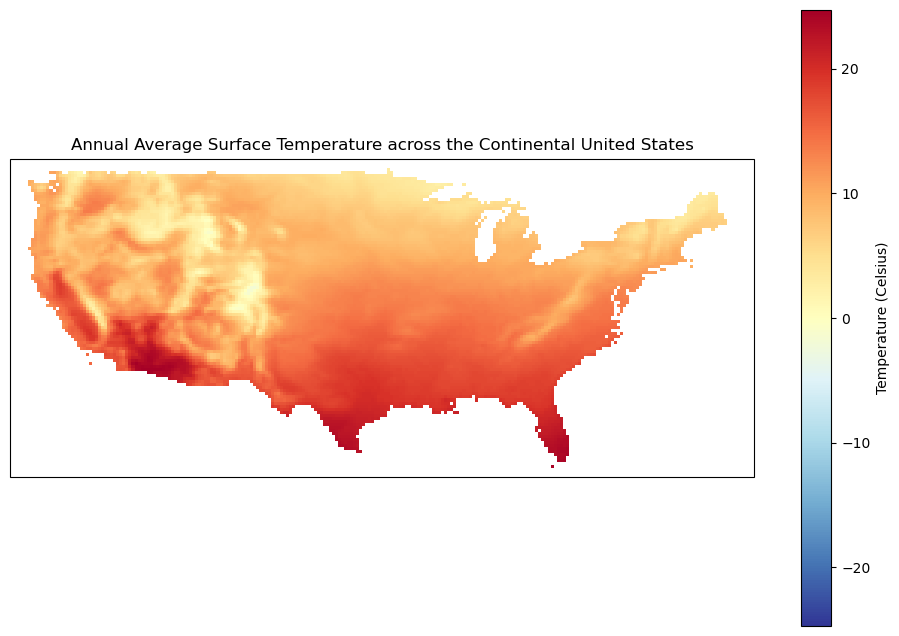

In [3]:
import matplotlib.pyplot as plot
import cartopy.crs as ccrs

# figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()}) # flatten projection

# make map, adjust colorbar
temp_plot = mean_temp.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", add_colorbar=True)
temp_plot.colorbar.set_label("Temperature (Celsius)")

# plot, show
plot.title("Annual Average Surface Temperature across the Continental United States")
plot.savefig("./plots/Annual_Average_Surface_Temp_CONUS_1988.png")
plot.show()

Now, we can do the same for precipitation.

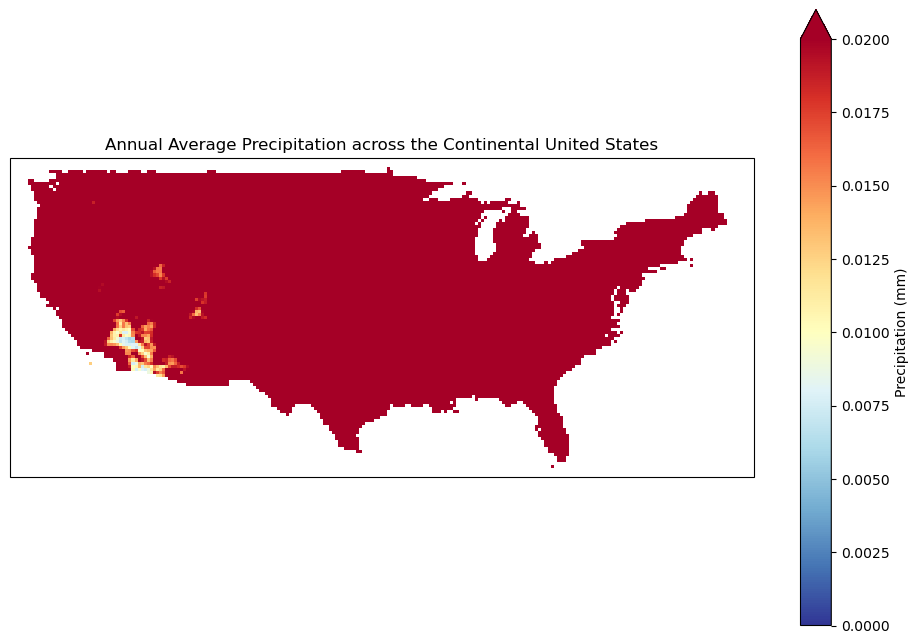

In [4]:
# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
clwc_plot = mean_precipitation.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", vmin=0, vmax=0.02, add_colorbar=True)
clwc_plot.colorbar.set_label("Precipitation (mm)")

# plot, show
plot.title("Annual Average Precipitation across the Continental United States")
plot.savefig("./plots/Annual_Average_Precipitation_CONUS_1988.png")
plot.show()

(Like some of the other samples, the nature of precipitation not being constant leads to the average is practically zero for all points.)

Let's now plot the annual average across the entire continental United States with a graph that shows how temperature changed with time.

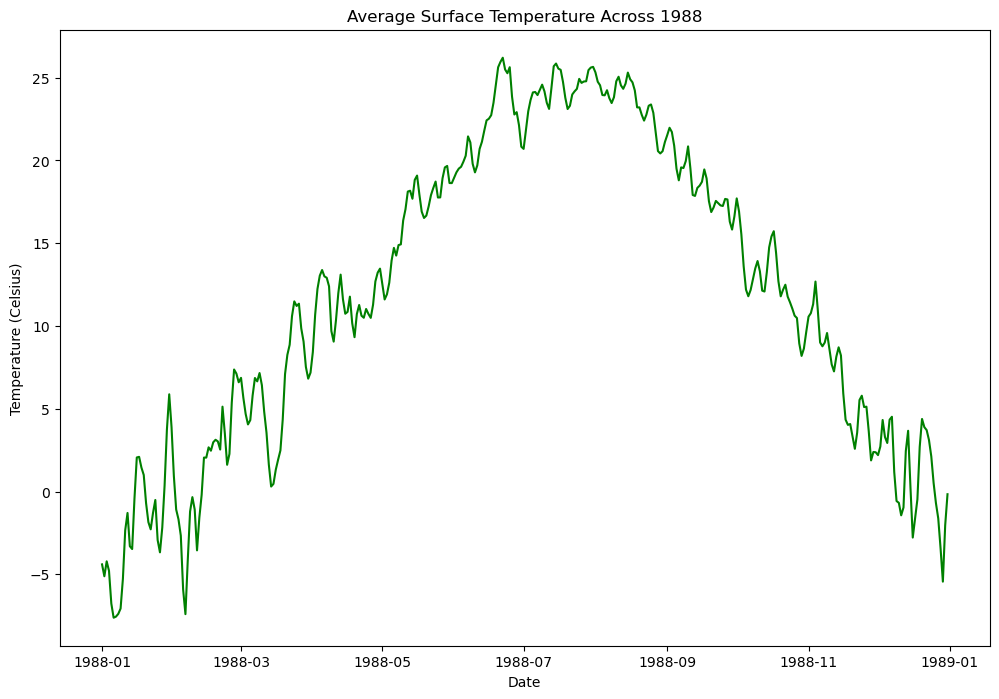

In [5]:
# create figure
theFigure = plot.subplots(figsize=(12,8))

# need to pass in the times, and then the data
plot.plot(temp_timeseries.valid_time, temp_timeseries, color="green")

# labels
plot.ylabel('Temperature (Celsius)')
plot.xlabel("Date")
plot.title("Average Surface Temperature Across 1988")
plot.savefig("./plots/Average_Surface_Temperature_TimeSeries_1988.png")
plot.show()

And the same for precipitation: 

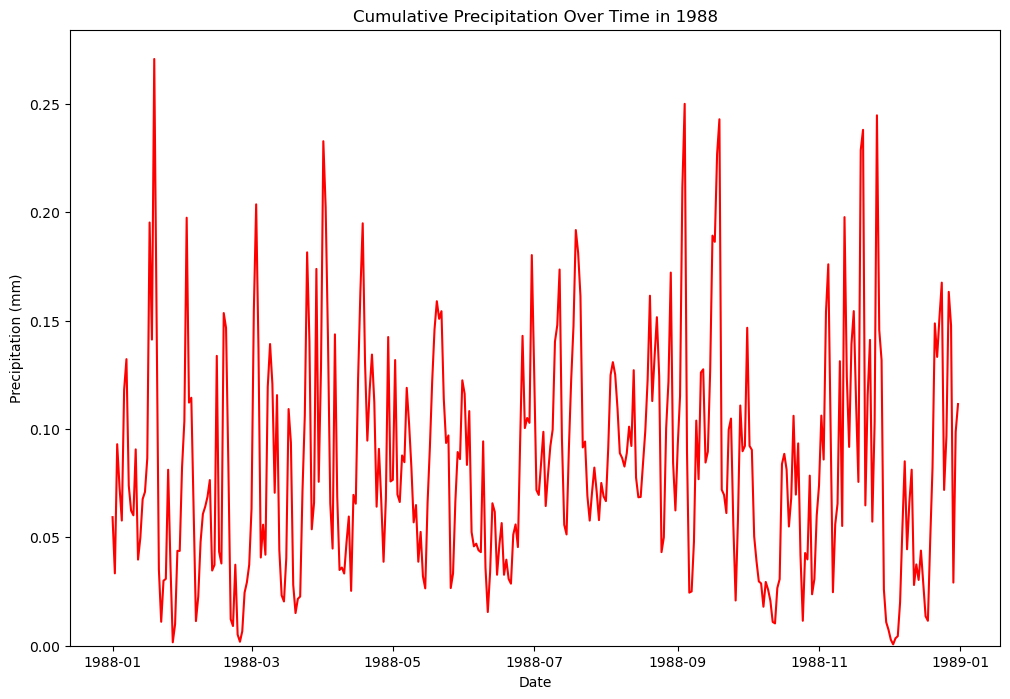

In [6]:
theFigure = plot.subplots(figsize=(12,8))
plot.plot(precipitation_timeseries.valid_time, precipitation_timeseries, color="red")
plot.ylabel("Precipitation (mm)")
plot.xlabel("Date")
plot.title("Cumulative Precipitation Over Time in 1988")
plot.ylim(bottom=0)
plot.savefig("./plots/Cumulative_Precipitation_TimeSeries_1988.png")
plot.show()